In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('ex1data2.txt', header=None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [19]:
df=pd.concat([pd.Series(1, index = df.index, name='00'), df],axis=1)
df.head()

,00,0,1,2
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


In [20]:
X=df.drop(columns=2)
y=df.iloc[:,3]
X.head()

,00,0,1
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4


In [21]:
for i in range(1, len(X.columns)):
    X[i-1]=X[i-1]/np.max(X[i-1])

In [22]:
X.head()

,00,0,1
0,1,0.469853,0.6
1,1,0.357302,0.6
2,1,0.535954,0.6
3,1,0.316213,0.4
4,1,0.669942,0.8


In [23]:
theta = np.array([0]*len(X.columns))
# Output : array([0,0,0])

In [24]:
m=len(df)

In [25]:
def hypothesis(theta, X):
    return theta*X

def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1 = np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

def gradientDescent(X, y, theta, alpha, i):
    J=[] #cost function in each iterations
    k=0
    while k<i:
        y1 = hypothesis(theta,X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha * (sum((y1-y)*X.iloc[:,c])/len(X))
        j=computeCost(X, y, theta)
        J.append(j)
        k+=1
    return J, j, theta

In [27]:
J, j, theta = gradientDescent(X, y, theta, 0.05, 10000)

In [28]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

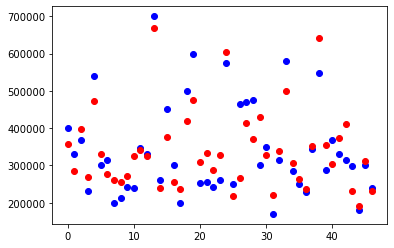

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0,47)), y = y, color='blue')
plt.scatter(x=list(range(0,47)), y = y_hat, color='red')
plt.show()

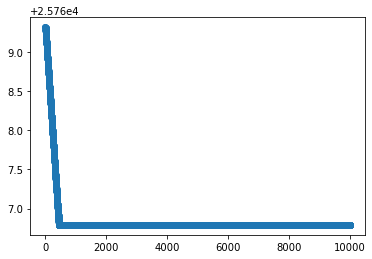

In [30]:
plt.figure()
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()